In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import nltk
import random
from nltk.corpus import stopwords
from textblob import TextBlob

In [2]:
# load csv into pandas dataframe
df=pd.read_csv("DailyComments.csv")

# change the names of the column headers
df.columns = ['day', 'comments']

# remove commas periods and apostrophes
df['comments'] = df['comments'].str.replace(r"'", '')
df['comments'] = df['comments'].str.replace(r'.', '')
df['comments'] = df['comments'].str.replace(r',', '')

# make everything lower case
df['comments'] = df['comments'].str.lower()

#remove stop words
stop = stopwords.words('english')
df['comments'] = df['comments'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [3]:
df.head(10)

,day,comments
0,Monday,hello you?
1,Tuesday,today good day!
2,Wednesday,birthday really special day!
3,Thursday,today neither good day bad day!
4,Friday,im bad day
5,Saturday,nothing special happening today
6,Sunday,today super good day!


In [4]:
# create function to return sentiment polarity
def polScore(string):
    return TextBlob(string).sentiment.polarity

# apply results of scoring to column
df['polarityScore'] = df['comments'].apply(lambda x: polScore(x))

df.head(6)

,day,comments,polarityScore
0,Monday,hello you?,0.000000
1,Tuesday,today good day!,0.875000
2,Wednesday,birthday really special day!,0.446429
3,Thursday,today neither good day bad day!,-0.087500
4,Friday,im bad day,-0.700000
5,Saturday,nothing special happening today,0.357143


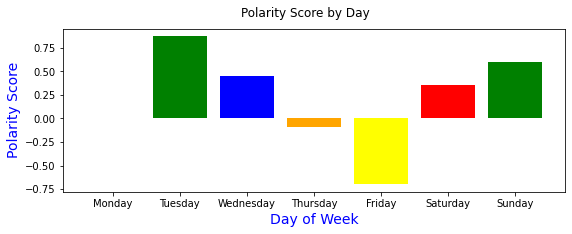

In [5]:
#plot polarity based on day of week

plt.figure(figsize=(9, 3))
#bar plot
plt.bar(df.day, df.polarityScore, color= ['red', 'green', 'blue', 'orange', 'yellow'])
plt.suptitle('Polarity Score by Day')
plt.xlabel('Day of Week', fontsize=14, color='blue')
plt.ylabel('Polarity Score', fontsize=14, color='blue')
plt.show()

In [6]:
#create function to determine if sentiment is positive negative or nuetral
def sentScore(x):
    if x > 0:
        return "Positive" # above 0
    elif x == 0:
        return "Neutral"  # at zero
    else:
        return "Negative"  # below zero

#call function to set sentiment per row
df['sentiment'] = df['polarityScore'].apply(lambda x: sentScore(x))

df.head(7)

,day,comments,polarityScore,sentiment
0,Monday,hello you?,0.000000,Neutral
1,Tuesday,today good day!,0.875000,Positive
2,Wednesday,birthday really special day!,0.446429,Positive
3,Thursday,today neither good day bad day!,-0.087500,Negative
4,Friday,im bad day,-0.700000,Negative
5,Saturday,nothing special happening today,0.357143,Positive
6,Sunday,today super good day!,0.604167,Positive


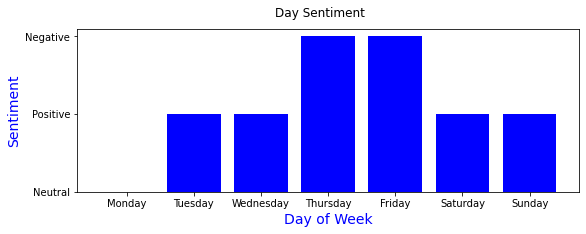

In [7]:
#plot sentiment based on day of week

plt.figure(figsize=(9, 3))
#bar plot
plt.bar(df.day, df.sentiment, color= ['blue'])
plt.suptitle('Day Sentiment')
plt.xlabel('Day of Week', fontsize=14, color='blue')
plt.ylabel('Sentiment', fontsize=14, color='blue')
plt.show()